In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns 

df = pd.read_csv('titanic.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Basic data exploration

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# Data preprocessing

from sklearn.impute import SimpleImputer

In [8]:
# Impute missing values for 'Age' with the median

age_imputer = SimpleImputer(strategy='median')
df['Age'] = age_imputer.fit_transform(df[['Age']])


In [9]:
# For the 'Embarked', the missing values are replaced with the most common values
embarked_mode = df['Embarked'].mode()[0]
df['Embarked'].fillna(embarked_mode,inplace=True)

In [10]:
# Remove'Ticket'

df=df.drop('Ticket', axis=1)

In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [ ]:
# Drop 'Cabin'

df.drop(columns=['Cabin'], inplace=True)

In [12]:
df['FamilySize'] = df['SibSp'] = df['Parch'] + 1

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     891 non-null    object 
 11  FamilySize   891 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


C:\Users\mvale\AppData\Local\Temp\ipykernel_23400\3186858664.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Survived', y='Age', data=df,palette='muted',split=True, ax=axes[0,0])


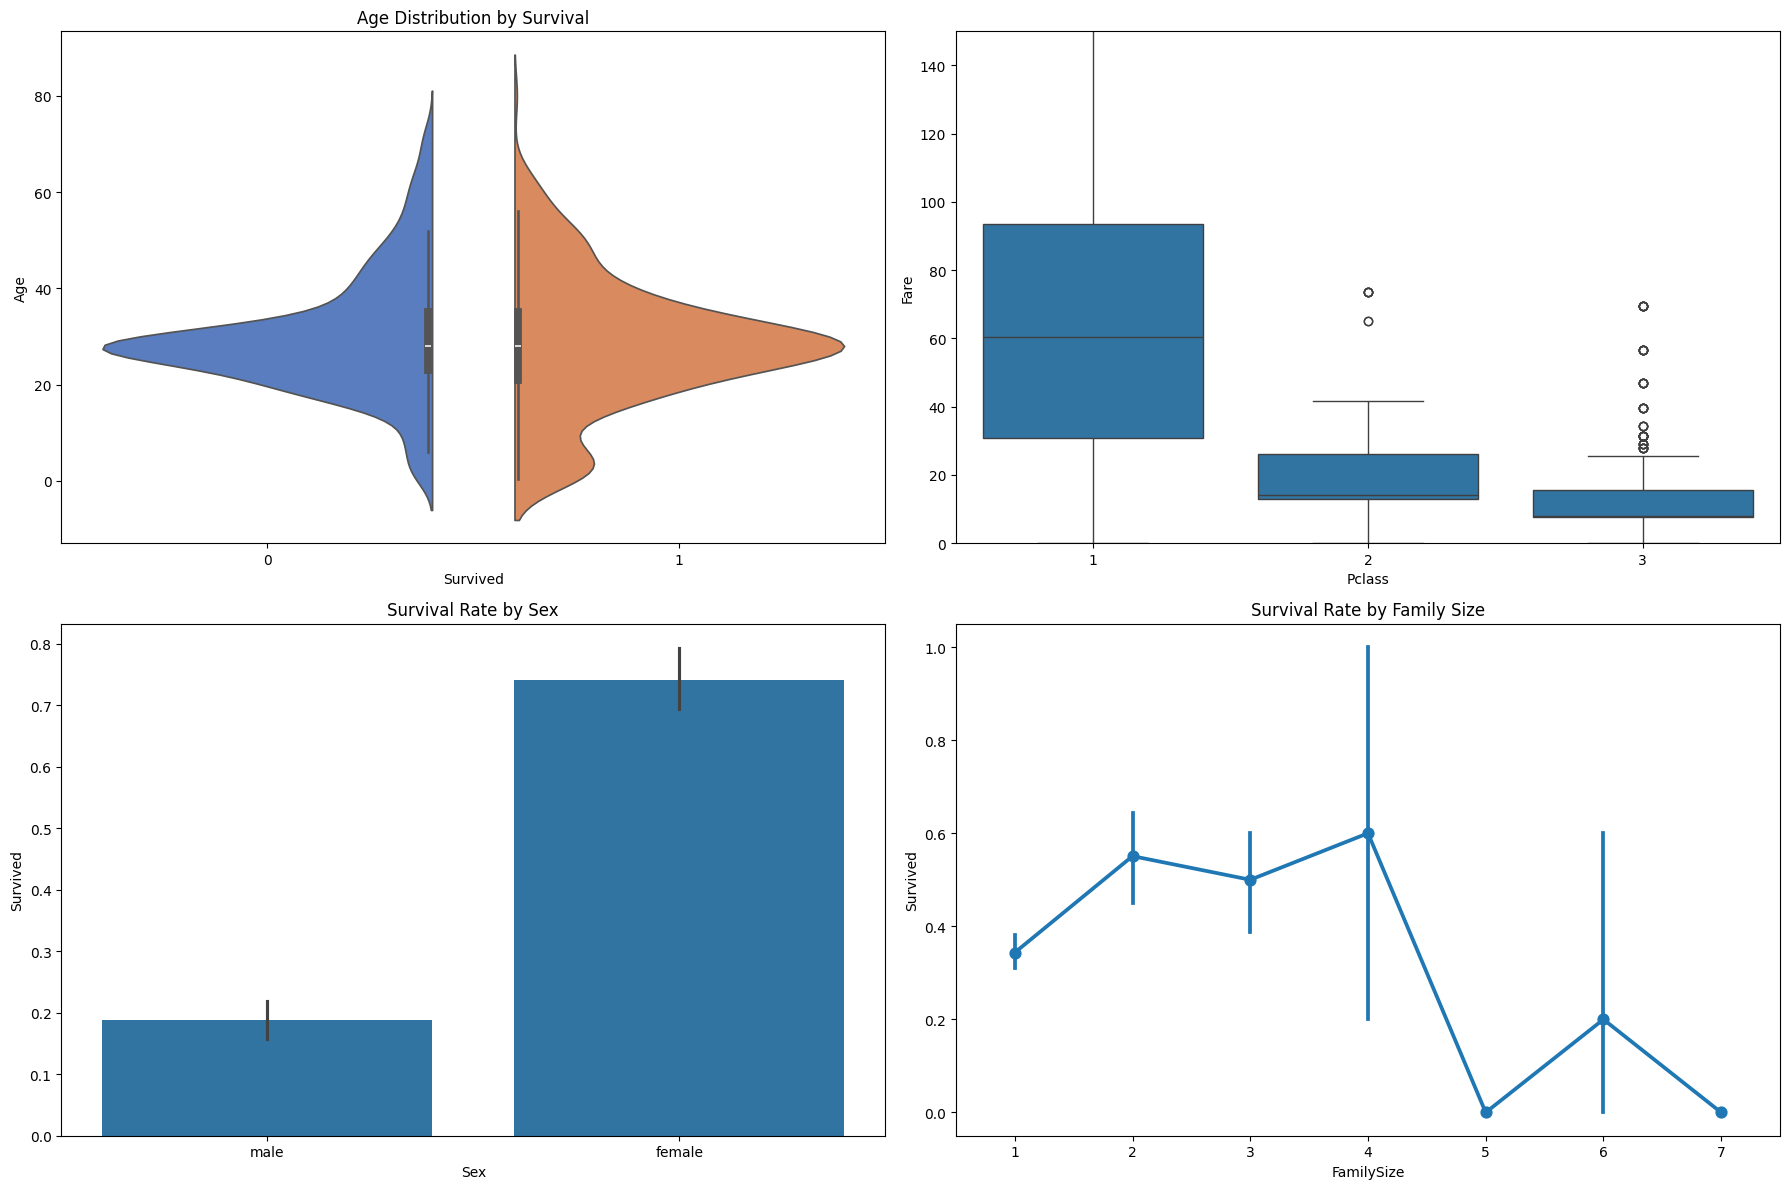

In [15]:
fig, axes = plt.subplots(2,2,figsize=(18,12))

sns.violinplot(x='Survived', y='Age', data=df,palette='muted',split=True, ax=axes[0,0])
axes[0,0].set_title('Age Distribution by Survival')

sns.boxplot(x='Pclass', y='Fare', data=df, ax=axes[0,1])
axes[0,1].set_ylim(0,150)

sns.barplot(x='Sex',y='Survived', data=df, ax=axes[1,0])
axes[1,0].set_title('Survival Rate by Sex')

sns.pointplot(x='FamilySize', y='Survived',data=df,ax=axes[1,1])
axes[1,1].set_title('Survival Rate by Family Size')

plt.tight_layout()
plt.show()

C:\Users\mvale\AppData\Local\Temp\ipykernel_23400\2650773797.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival=df.groupby('AgeGroup')['Survived'].mean()


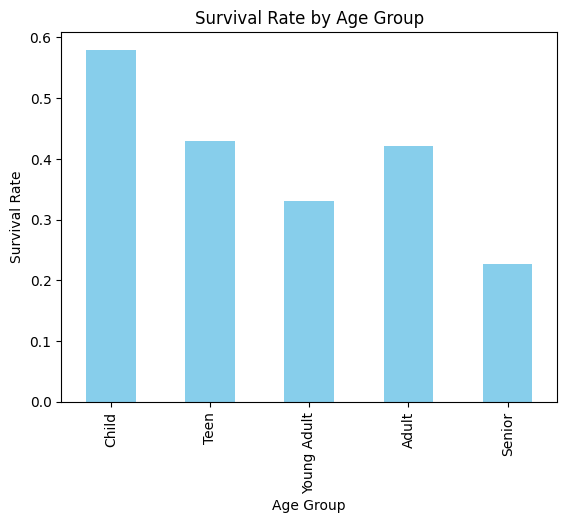

In [19]:
# fig,axes = plt.subplots(2,2,figsize=(18,12))
# sns.violinplot(x='Survived',y='Age',data=df,palette='muted',split=True,ax=axes[0,0])
# axes[0,0].set_title('Age Distribution by Survival')

age_bins=[0,12,18,30,60,100]
age_labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']
df['AgeGroup']=pd.cut(df['Age'],bins=age_bins, labels=age_labels)

age_survival=df.groupby('AgeGroup')['Survived'].mean()
age_survival.plot(kind='bar',color='skyblue')
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.show()

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [62]:
X=df['Age'].values
y=df['Survived'].values

X=X.reshape(-1,1)



In [63]:
s_model = LinearRegression()

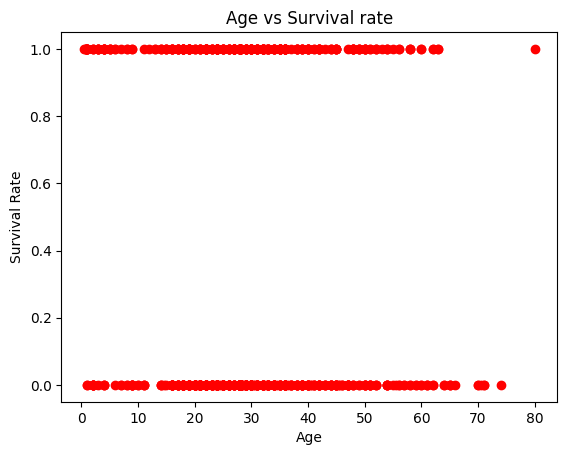

In [64]:
s_model.fit(X,y)
y_pred=s_model.predict(X)
plt.scatter(X,y,color='r')
plt.title('Age vs Survival rate')
plt.xlabel('Age')
plt.ylabel('Survival Rate')
plt.show()

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)